In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score

In [2]:
def build_model():
    model = Sequential()
    model.add(Dense(4, input_dim=4, activation='sigmoid'))
    model.add(Dense(3, activation='sigmoid'))
    return model
model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [3]:
data = pd.read_csv('iris.data')
print("Rows:",len(data))
print("Classes:",set(data['iris']))
samples = data.to_numpy()[:,:4] 
labels = data.to_numpy()[:,4]
samples = samples.astype(float)
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels.shape)
import sklearn.model_selection
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples, labels)
testSamples.shape

Rows: 150
Classes: {'Iris-virginica', 'Iris-setosa', 'Iris-versicolor'}
(150, 3)


(38, 4)

In [7]:
def step(tsamples, tlabels, model, opt, grads):
    with tf.GradientTape() as tape:
        predictions = model(tsamples)
        loss = categorical_crossentropy(tlabels,predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    grads.append(gradients[2])    
    opt.apply_gradients(zip(gradients, model.trainable_variables))
    return loss.numpy().mean()

In [8]:
def run_training(lr,decay):
    print("="*20)
    print(f"Learning rate {lr}, decay {decay}")
    print("="*20)
    opt = tf.keras.optimizers.Adam(learning_rate=lr, decay=decay)
    model = build_model()
    EPOCHS = 100
    grads = []
    accuracies = []
    losses = []
    for i in range(EPOCHS):
        loss = step(trainSamples,trainLabels,model,opt,grads)
        testResults = model.predict(testSamples)
        accuracy = accuracy_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))
        if(i%10 == 0):
            print(f'Step {i}, Loss {loss:.4f}, Accuracy: {accuracy:.2f}')
        accuracies.append(accuracy)
        losses.append(loss)

    # create the plots
    grads = np.array(grads)
    fig=plt.figure(figsize=(12,8))
    ax = plt.subplot(1, 2, 1)
    plt.plot(grads.reshape(grads.shape[0],-1))
    plt.title(f"Gradients LR:{lr} DECAY:{decay}")
    ax = plt.subplot(1, 2, 2)
    plt.plot(accuracies)
    plt.plot(losses)
    plt.ylim(0,2)
    plt.title(f"Accuracy and Loss")

    plt.savefig(f"grad_{lr}_{decay}_2.jpg")
    plt.show()

Learning rate 0.001, decay 0
Step 0, Loss 1.1531, Accuracy: 0.32
Step 10, Loss 1.1460, Accuracy: 0.34
Step 20, Loss 1.1394, Accuracy: 0.37
Step 30, Loss 1.1333, Accuracy: 0.32
Step 40, Loss 1.1276, Accuracy: 0.34
Step 50, Loss 1.1222, Accuracy: 0.32
Step 60, Loss 1.1171, Accuracy: 0.34
Step 70, Loss 1.1122, Accuracy: 0.34
Step 80, Loss 1.1073, Accuracy: 0.37
Step 90, Loss 1.1025, Accuracy: 0.37


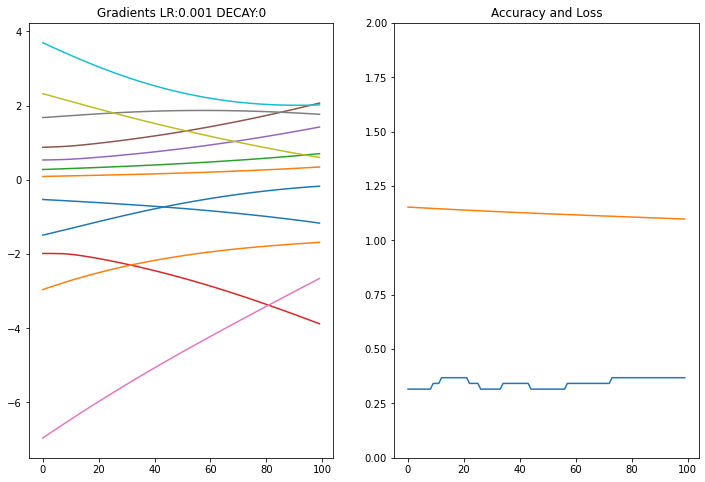

Learning rate 0.01, decay 0
Step 0, Loss 1.0603, Accuracy: 0.32
Step 10, Loss 0.9879, Accuracy: 0.47
Step 20, Loss 0.9242, Accuracy: 0.61
Step 30, Loss 0.8584, Accuracy: 0.63
Step 40, Loss 0.7924, Accuracy: 0.63
Step 50, Loss 0.7313, Accuracy: 0.63
Step 60, Loss 0.6759, Accuracy: 0.63
Step 70, Loss 0.6248, Accuracy: 0.79
Step 80, Loss 0.5771, Accuracy: 0.84
Step 90, Loss 0.5340, Accuracy: 0.89


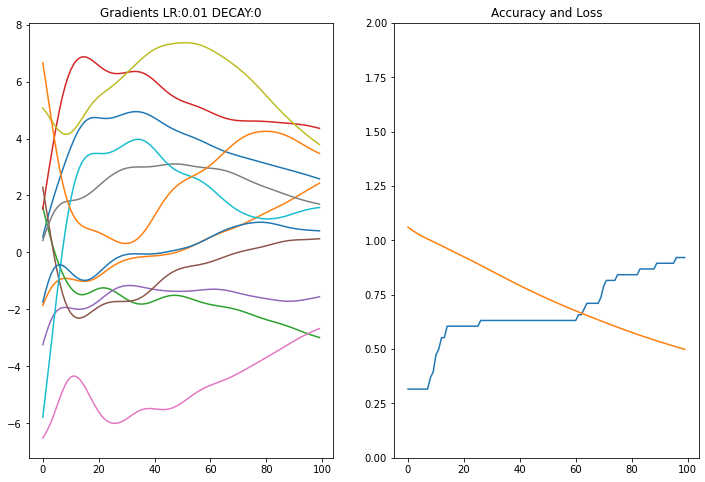

Learning rate 0.05, decay 0
Step 0, Loss 1.1188, Accuracy: 0.68
Step 10, Loss 0.9666, Accuracy: 0.63
Step 20, Loss 0.7537, Accuracy: 0.68
Step 30, Loss 0.6143, Accuracy: 0.68
Step 40, Loss 0.5461, Accuracy: 0.63
Step 50, Loss 0.5132, Accuracy: 0.68
Step 60, Loss 0.4967, Accuracy: 0.68
Step 70, Loss 0.4874, Accuracy: 0.63
Step 80, Loss 0.4815, Accuracy: 0.63
Step 90, Loss 0.4774, Accuracy: 0.66


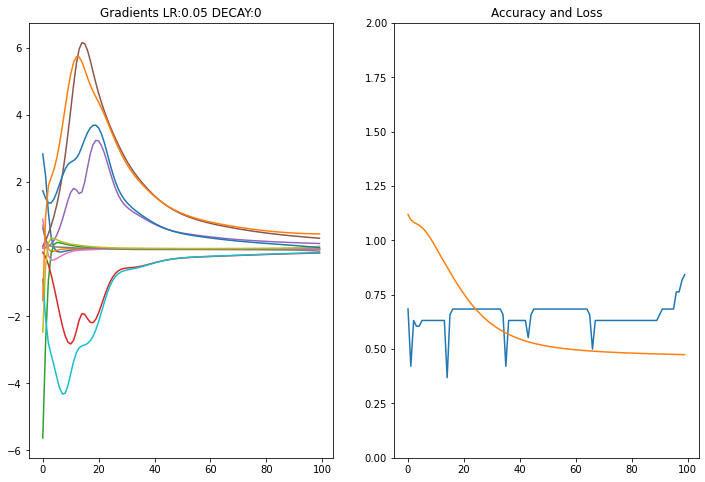

Learning rate 0.1, decay 0
Step 0, Loss 1.0154, Accuracy: 0.63
Step 10, Loss 0.5789, Accuracy: 0.63
Step 20, Loss 0.4581, Accuracy: 0.68
Step 30, Loss 0.3169, Accuracy: 0.97
Step 40, Loss 0.1368, Accuracy: 0.97
Step 50, Loss 0.0729, Accuracy: 0.97
Step 60, Loss 0.0526, Accuracy: 0.97
Step 70, Loss 0.0424, Accuracy: 0.97
Step 80, Loss 0.0365, Accuracy: 0.97
Step 90, Loss 0.0325, Accuracy: 0.97


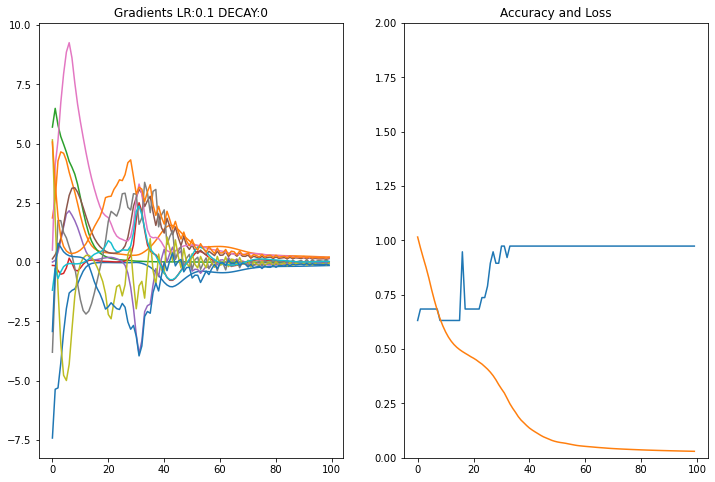

Learning rate 1, decay 0
Step 0, Loss 1.1293, Accuracy: 0.32
Step 10, Loss 1.0987, Accuracy: 0.32
Step 20, Loss 1.0986, Accuracy: 0.32
Step 30, Loss 1.0986, Accuracy: 0.32
Step 40, Loss 1.0986, Accuracy: 0.32
Step 50, Loss 1.0986, Accuracy: 0.32
Step 60, Loss 1.0986, Accuracy: 0.32
Step 70, Loss 1.0986, Accuracy: 0.32
Step 80, Loss 1.0986, Accuracy: 0.32
Step 90, Loss 1.0986, Accuracy: 0.32


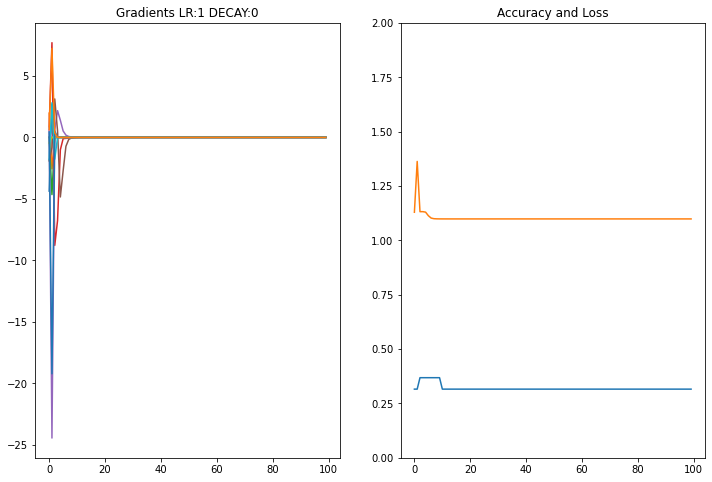

In [9]:
step_no=0
lr, decay = 0.1,0

run_training(0.001,0)

run_training(0.01,0)

run_training(0.05,0)

run_training(0.1,0)

run_training(1,0)


Learning rate 0.05, decay 0
Step 0, Loss 1.0843, Accuracy: 0.32
Step 10, Loss 0.8849, Accuracy: 0.63
Step 20, Loss 0.6707, Accuracy: 0.63
Step 30, Loss 0.5418, Accuracy: 0.76
Step 40, Loss 0.4266, Accuracy: 0.95
Step 50, Loss 0.2976, Accuracy: 0.97
Step 60, Loss 0.1996, Accuracy: 0.97
Step 70, Loss 0.1399, Accuracy: 0.97
Step 80, Loss 0.1052, Accuracy: 0.97
Step 90, Loss 0.0844, Accuracy: 0.97


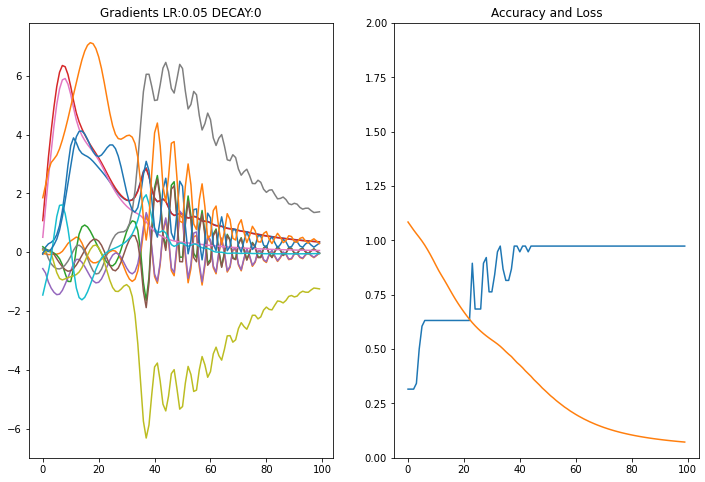

Learning rate 0.05, decay 0.01
Step 0, Loss 1.1204, Accuracy: 0.32
Step 10, Loss 0.9431, Accuracy: 0.68
Step 20, Loss 0.7441, Accuracy: 0.63
Step 30, Loss 0.6009, Accuracy: 0.66
Step 40, Loss 0.5113, Accuracy: 0.95
Step 50, Loss 0.4277, Accuracy: 0.95
Step 60, Loss 0.3458, Accuracy: 0.97
Step 70, Loss 0.2737, Accuracy: 0.97
Step 80, Loss 0.2179, Accuracy: 0.97
Step 90, Loss 0.1781, Accuracy: 0.97


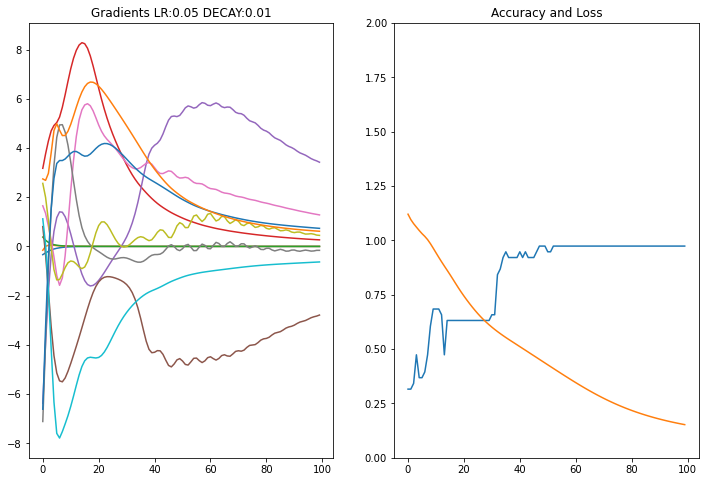

Learning rate 0.05, decay 0.1
Step 0, Loss 1.1094, Accuracy: 0.32
Step 10, Loss 0.9482, Accuracy: 0.74
Step 20, Loss 0.8298, Accuracy: 0.68
Step 30, Loss 0.7312, Accuracy: 0.66
Step 40, Loss 0.6585, Accuracy: 0.79
Step 50, Loss 0.6053, Accuracy: 0.84
Step 60, Loss 0.5647, Accuracy: 0.87
Step 70, Loss 0.5324, Accuracy: 0.92
Step 80, Loss 0.5056, Accuracy: 0.92
Step 90, Loss 0.4828, Accuracy: 0.92


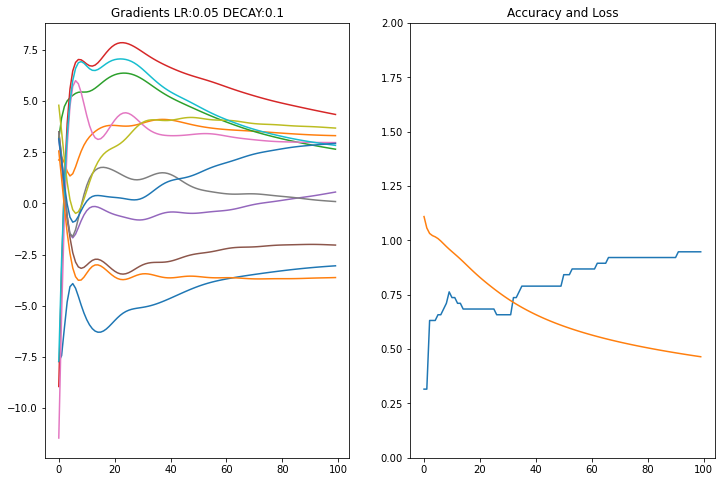

Learning rate 0.05, decay 1
Step 0, Loss 1.2289, Accuracy: 0.37
Step 10, Loss 1.1182, Accuracy: 0.37
Step 20, Loss 1.1024, Accuracy: 0.37
Step 30, Loss 1.0939, Accuracy: 0.37
Step 40, Loss 1.0879, Accuracy: 0.37
Step 50, Loss 1.0832, Accuracy: 0.37
Step 60, Loss 1.0793, Accuracy: 0.37
Step 70, Loss 1.0760, Accuracy: 0.37
Step 80, Loss 1.0731, Accuracy: 0.37
Step 90, Loss 1.0705, Accuracy: 0.37


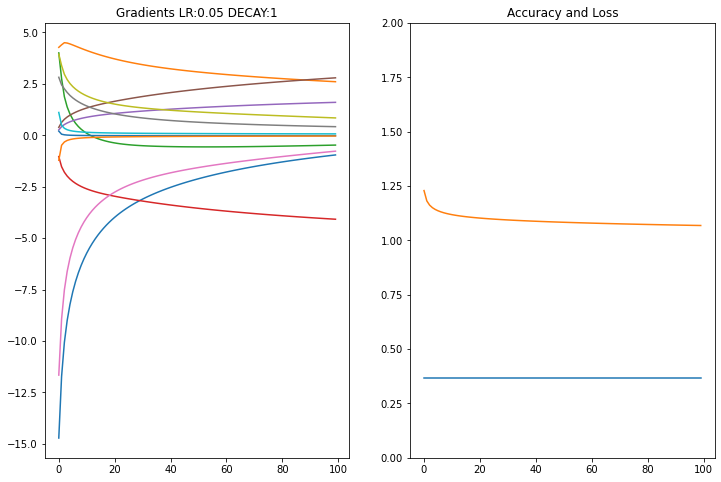

In [11]:
run_training(0.05,0)
run_training(0.05,0.01)
run_training(0.05,0.1)
run_training(0.05,1)
